# Numerical Derivatives Group Project 
#### Corey Dobbs and Emma Rasmussen 

## Problem 1- Finite Differences

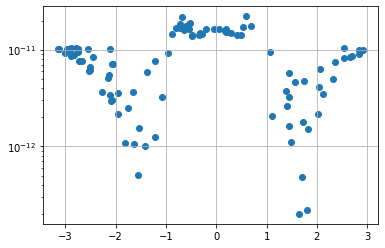

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
h = 10**(-5)

random_x = [random.uniform(-np.pi, np.pi) for _ in range(100)]
all_errors = []
for x in random_x:
    approx = (np.sin( x + h ) - np.sin( x - h )) / (2 * h)
    error = np.abs(approx - np.cos( x ))
    all_errors.append( error )

plt.scatter(random_x,all_errors)
plt.yscale('log')
plt.grid()
plt.show()

Now, to optimize h, we will just test out a bunch of h's and see which one seems optimal.

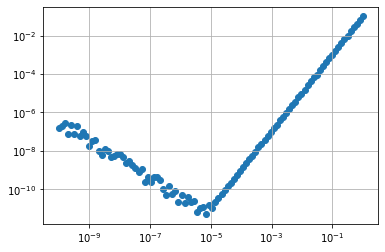

In [2]:
h_vals = np.logspace(-10, 0, num=100)
all_errors = []

for h in h_vals:
    x = np.array([random.uniform(-np.pi, np.pi) for _ in range(100)])
    approx = (np.sin( x + h ) - np.sin( x - h )) / (2 * h)
    error = np.abs(approx - np.cos( x ))
    meanerr = np.mean(error)
    all_errors.append( meanerr )

plt.scatter(h_vals,all_errors)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

By looking at the graph, we can see that the error seems to level off at about h = 10^5, so we can estimate an optimal h value of about h = $10^{-5}$. This h value has already been inserted into the error plot above, and one can see that the magnitude of the error doesn't get much above a magnitude of $10^{-11}$.

## Problem 2- More Sophisticated Derivatives

### Part a 

We deicided to do the Automatic and Chebyshev methods (called Dual and Chebyshev in driver)

In [3]:
!pip install git+https://github.com/chebpy/chebpy.git
!pip install autograd

  Cloning https://github.com/chebpy/chebpy.git to c:\users\rasmu\appdata\local\temp\pip-req-build-xzk30esi
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for chebpy: filename=chebpy-0.4.3.3-py3-none-any.whl size=55107 sha256=b518941b5074a29e6fcef56229f7ab6f0333ddc54d5a2a7e78965ce329dbaa5b
  Stored in directory: C:\Users\rasmu\AppData\Local\Temp\pip-ephem-wheel-cache-cxyl8fgo\wheels\31\6e\ce\d3a09a38c5c744791620e0fcaef3ea23b8d9c6712f3ea17fb2
Successfully built chebpy


In [31]:
import numpy as np
import matplotlib.pyplot as plt

import chebpy as cheb
def func(x):
    return 3*x**2 + 1/np.pi**2 * np.log((np.pi-x)**2) + 1


def chebyshev( function, interval, N=100 ):
    f = cheb.chebfun( function, interval, n=N )
    plt.figure()
    derivative = f.diff()
    derivative.plot()
    plt.grid()
    return derivative

In [13]:
import matplotlib.pyplot as plt
import autograd.numpy as anp
from autograd import grad

def dual(fun, interval, N=100):
    x = np.linspace(interval[0], interval[1], N)
    deriv  = grad(fun) # Obtain gradient function
    plt.plot(x, list(map(deriv, x)))
    plt.show()
    return deriv

In [15]:
import time
def driver( method, function, interval, N=100 ):
    if method=='chebyshev':
        start = time.time()
        derivative = chebyshev( function, interval, N )
        end = time.time()
    elif method=='dual':
        start = time.time()
        derivative = dual( function, interval, N )
        end = time.time()
    else:
        print('Please choose a method \'chebyshev\' or \'dual\'')
    total_time = end - start
    print(f'The total time it took was {total_time}')
    print(f'The derivative graph is shown. {derivative}')


In [25]:
import numpy as np

def func1(x):
    return anp.sin(x)

def func2(x):
    return anp.sin(1/x)

def func3(x):
    return 3*x**2 + 1/anp.pi**2*anp.log((anp.pi-x)**2) + 1

def func4(x):
    for _ in range(100):
        x = anp.sin(x)
    return x

def func5(x):
    A = anp.array([[1,x],[2,x**2]])
    b = anp.array([1,1])
    y = anp.linalg.solve(A,b)
    normy = anp.linalg.norm(y)
    return 1/normy

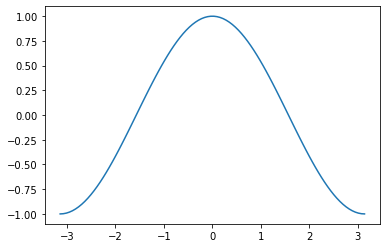

The total time it took was 0.4151725769042969
The derivative graph is shown. <function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x00000223E300E3A0>


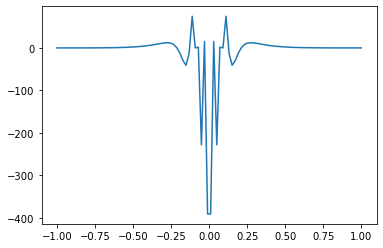

The total time it took was 0.2422928810119629
The derivative graph is shown. <function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x00000223E3245310>


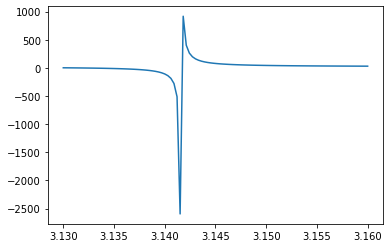

The total time it took was 0.4467599391937256
The derivative graph is shown. <function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x00000223E2FD9CA0>


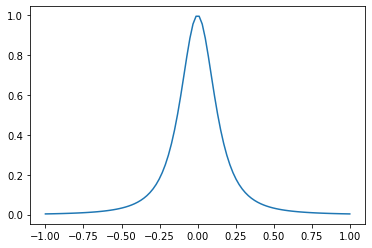

The total time it took was 0.8099226951599121
The derivative graph is shown. <function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x00000223E3060160>


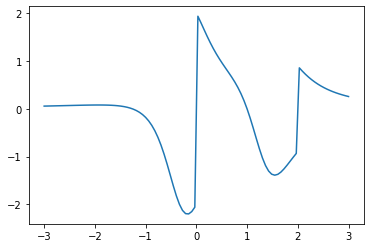

The total time it took was 0.3170638084411621
The derivative graph is shown. <function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x00000223E32E6940>


In [27]:
driver('dual', func1, [-np.pi,np.pi], 100)
driver('dual', func2, [-1,1], 100)
driver('dual', func3, [3.13,3.16], 100)
driver('dual', func4, [-1,1], 100)
driver('dual', func5, [-3,3], 100)

The total time it took was 0.07551765441894531
The derivative graph is shown. <chebfun-col,1,99>

The total time it took was 0.0388185977935791
The derivative graph is shown. <chebfun-col,1,99>

The total time it took was 0.04212784767150879
The derivative graph is shown. <chebfun-col,1,99>

The total time it took was 0.04777097702026367
The derivative graph is shown. <chebfun-col,1,99>



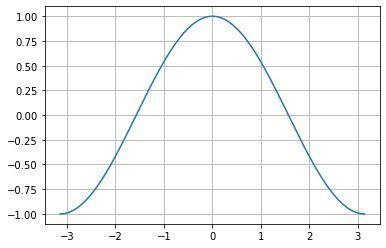

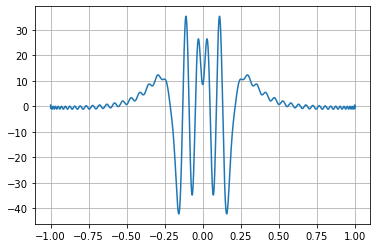

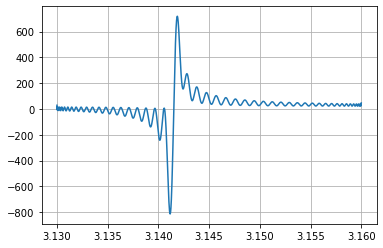

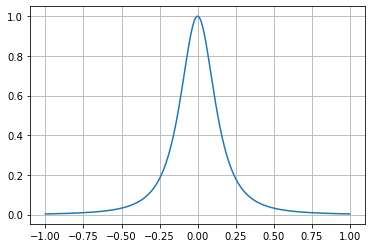

In [32]:
driver('chebyshev', func1, [-np.pi,np.pi], 100)
driver('chebyshev', func2, [-1,1], 100)
driver('chebyshev', func3, [3.13,3.16], 100)
driver('chebyshev', func4, [-1,1], 100)
#driver('chebyshev', func5, [-3,3], 100)